<a href="https://colab.research.google.com/github/SahanaDil/UCSD-deep-neural-networks/blob/main/Batch_Optimization_Algorithms_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Copyright: © NexStream Technical Education, LLC**.  
All rights reserved

# DNN Framework Updates to Support Batch Optimizations
In this project, we'll implement mini-batching to improve the performance in the descent algorithm.  

The following instructions are identified as Steps in the text cells preceding their corresponding code cell. Read through the instructions and write/fill-in the appropriate code in the cells.

**Step 1:**
- Import the required libraries as shown in the code cell.

In [2]:
# Imports

import numpy as np
import matplotlib.pyplot as plt

import math
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import seaborn as sns
from matplotlib import cm

## The Framework
Implement the Layer, Dense, and Model classes you wrote and tested in the previous units.  

**Step 2:**  
Recreate the Layer class.
Note, the new argument "train_or_test" has been included in the Layer constructor to let you specify if you are training or testing

In [3]:
class Layer:

  # Constructor includes new argument "train_or_test" to let you specify if you are training or testing.
  def __init__(self, output_units, input_units, activation, initialization='he', train_or_test='train'):

    #Initialize weights, biases, and activations
    # INSERT YOUR FRAMEWORK CODE HERE
    self.learning_rate = 0.01
    self.weights = np.random.randn(output_units, input_units) * np.sqrt(2/input_units)
    self.biases = np.zeros((output_units, 1))
    self.activation = activation


  #Activation methods:
  #   sigmoid
  #   relu
  #   tanh
  # INSERT YOUR FRAMEWORK CODE HERE
  def sigmoid(self, Z):
    return 1/(1 + np.exp(-Z))

  def relu(self, Z):
    return np.maximum(0,Z)

  def tanh(self, Z):
    return np.tanh(Z)

  # Backward activations (computes the derivatives of activation functions)
  #   activation_backwards
  # INSERT YOUR FRAMEWORK CODE HERE
  def activation_backwards(self, Z, dA):
    if self.activation == 'sigmoid':
      sigmoid = self.sigmoid(Z)
      grad = sigmoid * (1-sigmoid)
      return dA * grad

    if self.activation == 'relu':
      grad = np.where(Z > 0, 1, 0)
      return dA * grad

    if self.activation == 'tanh':
      tanh = self.tanh(Z)
      grad = 1 - tanh ** 2
      return dA * grad


  #Abstract methods declarations
  #   forward
  #   backward
  #   update
  # INSERT YOUR FRAMEWORK CODE HERE
  def forward(self, X):
    self.X = X
    self.Z = np.dot(self.weights, X) + self.biases
    if self.activation == 'sigmoid':
      self.A = self.sigmoid(self.Z)
    elif self.activation == 'relu':
        self.A = self.relu(self.Z)
    elif self.activation == 'tanh':
        self.A = self.tanh(self.Z)

    return self.A

    def backward(self, dA_prev, optimizer, iteration):
      dZ = self.activation_backwards(self.Z, dA_prev)
      m = self.input.shape[1]
      self.dW = (1/m) * np.dot(dZ, self.input.T)
      self.db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
      dA_prev = np.dot(self.weights.T, dZ)
      return dA_prev

    def update(self):
      self.weights -= self.learning_rate * self.dW
      self.biases -= self.learning_rate * self.db

**Step 3:**  
Recreate the Dense class from the previous units You will need the constructor(), forward(), backward(), and update() methods.  
- *init*
  - call parent class
  - initialize instance variables for moving averages and hyperparameters:
    - V_dW, V_dB to zero with shapes corresponding to the weights and biases respectively
    - beta1 to 0.9
    - S_dW, S_dB to zero with shapes corresponding to the weights and biases respectively
    - beta2 to 0.999
    - epsilon to 1e-8
- *forward*
  - Here we just need to add input parameter 'train_or_test' for later use.  The implementation otherwise remains the same as in the DNN framework.
- *backward*
  - Here we just need to add input parameter 'optimizer', and 'iteration' for later use.  
  - Increment the iteration after your DNN framework code has been inserted.
  - Otherwise the implementation remains the same as in the DNN framework
- *update*
  - Here we just need to add input parameter 'optimizer' and compute the weights and biases the same as in the DNN framework based on a conditional check on optimizer == 'gradient descent'

In [4]:
class Dense(Layer):

  # Inherit from the Layer class.
  def __init__(self, output_units, input_units, activation, initialization='he', train_or_test='train'):
    super().__init__(output_units, input_units, activation, initialization, train_or_test)


    # Initialize moving averages and hyperparameter values.
    self.V_dW = np.zeros_like(self.weights)
    self.V_db = np.zeros_like(self.biases)
    self.beta1 = 0.9
    self.S_dW = np.zeros_like(self.weights)
    self.S_db = np.zeros_like(self.biases)
    self.beta2 = 0.999
    self.epsilon = 1e-8


  # Forward step for a single layer.
  # Use your framework method with addition of 'train_or_test'
  def forward(self, input, train_or_test):
    # INSERT YOUR FRAMEWORK CODE HERE
     # Create an instance variable for the input.
    self.input = input
    self.train_or_test = train_or_test


  # Calculate Z using the weights, biases, and input of this layer,
  # then store Z in an instance variable
    Z = np.dot(self.weights, self.input) + self.biases
    self.Z = Z


  # Check which activation function was set in your layer instance
  # (see previous test cell), then call the correct method.
  # e.g. if layer.activation == "sigmoid": A = layer.sigmoid(Z)
    if self.activation == "sigmoid":
      A = self.sigmoid(Z)

    elif self.activation == "relu":
      A = self.relu(Z)

    elif self.activation == 'tanh':
      A = self.tanh(Z)

  # Store the activation result as an instance variable and return it.
    self.A = A



    assert (self.Z.shape == (self.weights.shape[0], self.A.shape[1]))
    assert (self.A.shape == (self.weights.shape[0], self.input.shape[1]))
    return A


  # Backward step for a single layer.
  # Use your framework method with addition of 'optimizer', and 'iteration'
  # Increment the iteration
  def backward(self, dA_prev, optimizer, iteration):
    # INSERT YOUR FRAMEWORK CODE HERE
    dZ = self.activation_backwards(self.Z, dA_prev)
    self.optimizer = optimizer
    self.iteration = iteration

  # Extract the number of examples from the shape of the input instance variable
  # that you created in your forward method.
    m = self.input.shape[1]

  # Calculate dW and db using the input to this layer (ie the activation of the previous layer).
  # For db,
    self.dW = (1/m) * np.dot(dZ, self.input.T)
    self.db = (1/m) * np.sum(dZ, axis=1, keepdims=True)

  # Calculate dW and db using the input to this layer (ie the activation of the previous layer).
    dA_prev = np.dot(self.weights.T, dZ)



    # Iteration counter.
    iteration += 1

    assert (dA_prev.shape == self.input.shape)
    assert (self.dW.shape == self.weights.shape)
    assert (self.db.shape == self.biases.shape)
    return dA_prev

  # Parameter update for a single layer.
  # Use your framework method with addition of 'optimizer'
  # Conditionally compute weights and biases based on 'gradient descent'
  def update(self, learning_rate, optimizer):

    if optimizer == 'gradient descent':
      # INSERT YOUR FRAMEWORK CODE HERE (weights and bias update equations)
        self.weights-= learning_rate * self.dW
        self.biases-= learning_rate * self.db



**Step 4:**  
Recreate the Model class.  You will need the constructor and the following methods:

- build():  Same as your DNN framework
- feedforward():  Same as your DNN framework except pass train_or_test to the forward method when looping over the layers.
- compute_cost():  Same as your DNN framework.  Remember to add epsilon to the log function (in the binary cross entropy cost equation), and to squeeze the costs to reduce its dimensions.
- backpropagation():  Same as your DNN framework except pass optimizer type and iteration so can pass it into the backward method call.
- parameter_update():  Same as your DNN framework except pass optimizer type so can pass it into the update method call.
- train():  Same as your DNN framework except:
  - additionally pass train_or_test='train' into feedforward method call.
  - add epsilon to the dAL divide operation.
  - additionally pass optimizer type and iteration into backpropagation method call.
  - additionally pass optimizer type into parameter_update method call.
- fit():  Same as your DNN framework except:  
  - additionally pass batch size and optimizer type.
  - call make_minibatch() with X, y training data and batch size.
  - loop over the epochs (outer loop), then loop over X and y in the minibatches (inner loop).
  - call the train method and append the cost to the list, remember to pass the optimizer and iteration number to train().  
  - append the iteration and cost to the list as a tuple.
- predict():  Same as your DNN framework except:
  - additionly pass in train_or_test = test to the feedforward() method call
  - set predictions to either 0 or 1.
- evaluate():  Same as your DNN framework  
<br>



**Step 5:**  
Add a new method, make_minibatch()   
First, we shuffle the data (see #1 in the code cell template).  This is important as it makes each minibatch more likely to be representative of the overall distribution.   
Next, we partition the data into batches of size “mini batch size” (see #2 in the code cell template).  For example, if we partition our training dataset into 90 examples, this means with a batch_size of 16, we’ll have 5 full mini-batches, and then one left over containing only 10 examples.    Here, we want to iterate over the number of minibatches.  You can see that we are using multidimensional array slicing to index from the “kth” example to the example indexed by “k + batch_size”.  This then completes a minibatch.    
Then, we need to process the special case for the final minibatch (see #3 in the code cell template).  This minibatch should take the leftover examples and put them into a minibatch.

**Step 6:**  
Next, let’s look at the” fit” function. Here, you can see now that we need a “for loop” over the minibatches.
We can do this by iterating through the list of minibatches for X and Y, since the “make_minibatch” function returns a list of tuples.
Inside the “for loop”, you can perform batch descent as normal, except this time using the size of the minibatch as “m”.
Essentially you would treat each minibatch as an entire training set and perform descent on it.
However, since the minibatches will be much smaller than the overall training set, this means you will be taking more steps per epoch and convergence will happen faster.
Typically, we create minibatches of size n where n is a power of 2, since this is convenient for CPU and GPU implementations and storage.
You’ll therefore often see and use minibatches of size 16, 32, 64, or some other power of 2.


**Step 7:**  
Finally, we also need to recreate the plot() and make_plot methods from the previous unit used to plot the training costs.

In [5]:
class Model:

  def __init__(self):
    self.epsilon = 1e-8

  def build(self, network):
    # INSERT YOUR FRAMEWORK CODE HERE
    self.network = network

  # Forward propagation.
  def feedforward(self, X, train_or_test):

    # Set the input to X.
    # INSERT YOUR FRAMEWORK CODE HERE
    input = X

    # Loop over the layers and call the forward method on each input.
    # Pass in train_or_test to specify if this is training or test time.
    for l in self.network:
      input = l.forward(input, train_or_test)

    # Set AL to the final value of input (i.e. the output of the final layer).
    # INSERT YOUR FRAMEWORK CODE HERE
    AL = input
    assert (AL.shape == (1, X.shape[1]))
    return AL

  # Compute cost (binary cross entropy)
  # Add epsilon to the log function
  # Remember to call np.squeeze
  def compute_cost(self, m, AL, Y):
    # INSERT YOUR FRAMEWORK CODE HERE
    #Compute the cost using binary cross entropy loss equation
    cost = -(1/m)*np.sum(Y * np.log(AL + self.epsilon)+ (1-Y)*np.log(1-AL+self.epsilon))
    #Squeeze the result to remove the 1 dimensional entry
    cost = np.squeeze(cost)

    return cost


  # Backpropagate through layers.
  # Pass in the optimizer type and iteration
  def backpropagation(self, dAL, optimizer, i):

    # Set dA_prev to dAL.
    # INSERT YOUR FRAMEWORK CODE HERE
    dA_prev = dAL

    # Loop over the layers in reverse and call the backward method on each dA_prev.
    for l in reversed(self.network):
      # We pass the optimizer and iteration here so we can compute the backprop steps.
      dA_prev = l.backward(dA_prev, optimizer, i)



  # Parameter update.
  def parameter_update(self, learning_rate, optimizer):

    # Loop over layers and call the update method from each.
    # Pass in the optimizer type
    for l in self.network:
      l.update(learning_rate, optimizer)



  # Single iteration of descent.
  def train(self, X, Y, learning_rate, optimizer, i):

    # Extract number of example from the shape of Y.
    # INSERT YOUR FRAMEWORK CODE HERE
    m = X.shape[1]

    # Compute AL by running forward propagation.
    # Set train_or_test = 'train'
    AL = self.feedforward(X, train_or_test='train')

    # Compute the cost
    # INSERT YOUR FRAMEWORK CODE HERE
    cost = self.compute_cost(m, AL, Y)

    # Initialize backpropagation by calculating dAL.
    # INSERT YOUR FRAMEWORK CODE HERE
    # Add epsilon to the denominator of the divide function
    dAL = - (Y / (AL + self.epsilon) - (1 - Y) / (1 - AL + self.epsilon))

    # Backpropagate through layers.
    # Pass in dAL, optimizer type, and iteration
    self.backpropagation(dAL, optimizer, i)

    # Update parameters.
    # Pass in optimizer type
    self.parameter_update(learning_rate, optimizer)

    return cost


  # Function for training loop.
  def fit(self, X_train, Y_train, epochs, learning_rate, batch_size, optimizer='gradient descent', verbose=False, callback=None):

    # Initialize list of costs.
    # INSERT YOUR FRAMEWORK CODE HERE
    costs = []
    iteration = 0

    # Make minibatches from the input data.
    # Call make_minibatch() with X, y training data and batch size

    # Loop over epochs.
    for i in range(epochs):

      mini_batches_train = self.make_minibatch(X_train, Y_train, batch_size)

      # Loop over X and y in the minibatches
      for X, y in mini_batches_train:

        # Call the train method and append the cost to the list. Remember to pass the optimizer and iteration number to train().
        cost = self.train(X, y, learning_rate, optimizer, i)
        # Append the iteration and cost to the list as a tuple.
        costs.append((i, cost))
        iteration += 1


      if (i % 50 == 0):
        if verbose==True:
          print ("Iteration: {}, cost: {}". format(i, cost))

        if (callback is not None):
          callback(i, X_train, Y_train)

    return costs


  # Predict labels.
  def predict(self, X):

    # Get the predictions (output of the final layer after training).
    # Remember to specify that this is test time (set train_or_test to 'test')
    predictions = self.feedforward(X, train_or_test='test')

    # Set predictions to either 0 or 1.
    # INSERT YOUR FRAMEWORK CODE HERE
    predictions = np.where(predictions > 0.5, 1, 0 )

    return predictions


  # Evaluate prediction accuracy.
  def evaluate(self, predictions, Y):

    # calculate accuracy.
    # INSERT YOUR FRAMEWORK CODE HERE
    accuracy = np.mean(predictions == Y) * 100
    return accuracy


  # Batching function
  def make_minibatch(self, X, Y, mini_batch_size):

    # To make your "random" minibatches the same each time.
    np.random.seed(0)  #Do not change, for grading purposes

    m = X.shape[1]

    # List of minibatches.
    mini_batches = []

    # 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1,m))

    # 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):

      mini_batch_X = shuffled_X[:, (k * mini_batch_size) : ((k + 1) * mini_batch_size)]
      mini_batch_Y = shuffled_Y[:, (k * mini_batch_size) : ((k + 1) * mini_batch_size)]

      mini_batch = (mini_batch_X, mini_batch_Y)
      mini_batches.append(mini_batch)

    # 3. Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:

      mini_batch_X = shuffled_X[:, (mini_batch_size * math.floor((m / mini_batch_size))) : m]
      mini_batch_Y = shuffled_Y[:, (mini_batch_size * math.floor((m / mini_batch_size))) : m]

      mini_batch = (mini_batch_X, mini_batch_Y)
      mini_batches.append(mini_batch)

    return mini_batches

**Plot functions**

- plot:  updated to include the mini-batch iteration
- make_plot: same as before

<br>

[Credit for visualizations](https://towardsdatascience.com/lets-code-a-neural-network-in-plain-numpy-ae7e74410795)

In [6]:
# Use matplotlib to plot the costs.
def plot(costs):
  # Use *zip() to plot the list of tuples of (iteration, cost).
  plt.plot(*zip(*costs))
  plt.xlabel('Epochs')
  plt.ylabel('Cost')


  return plt

In [7]:
# The function making up the graph of a dataset
def make_plot(X, y, plot_name, file_name=None, XX=None, YY=None, preds=None, dark=False):
    if (dark):
        plt.style.use('dark_background')
    else:
        sns.set_style("whitegrid")
    plt.figure(figsize=(16,12))
    axes = plt.gca()
    axes.set(xlabel="$X_1$", ylabel="$X_2$")
    plt.title(plot_name, fontsize=30)
    plt.subplots_adjust(left=0.20)
    plt.subplots_adjust(right=0.80)
    if(XX is not None and YY is not None and preds is not None):
        plt.contourf(XX, YY, preds.reshape(XX.shape), 25, alpha = 1, cmap=cm.Spectral)
        plt.contour(XX, YY, preds.reshape(XX.shape), levels=[.5], cmap="Greys", vmin=0, vmax=.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
    if(file_name):
        plt.savefig(file_name)
        plt.close()

## Framework Updates Check on Planar Data
**Step 8:**  
Now we’re going to recap how to build a model and train it on data.
In our project, we’re going to be working with a binary classification planar dataset like the one we used previously.
This step is to check out the updates made to the framework, and confirm that nothing broke during the process.  We will be running the network using the same planar dataset, but we'll set the new mini-batch size parameter to the number of examples which is effectively the same as what we had with the original framework.
Run the code provided to create the dataset, and then call the “make plot” function as you did in the previous unit to see the dataset visualized.    

Then build your model, train it, and evaluate the performance.  You should see the same performance as with the original configuration (all the doctests should still pass).

<br>

WHEN YOU COMPLETE THIS SECTION - STOP, AND UPLOAD YOUR COLAB SCRIPT FOR THIS ASSIGNMENT.  THE OTHER PARTS IN THE COLAB SCRIPT WILL BE FOR SUBSEQUENT PROJECT/ASSIGNMENTS

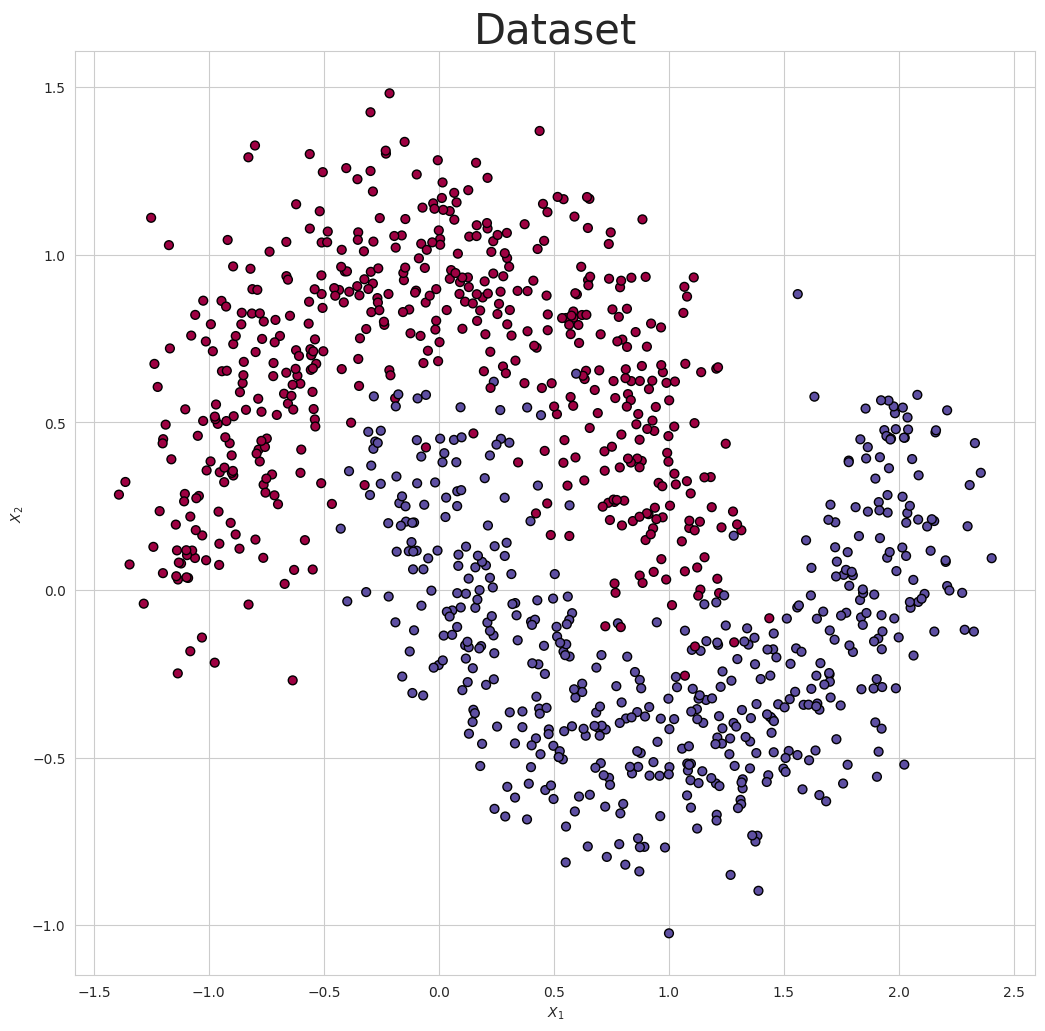

In [ ]:
#This is the original Planar set from the DNN framework
N_SAMPLES = 1000

X, Y = make_moons(n_samples = N_SAMPLES, noise=0.2, random_state=100)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
make_plot(X, Y, "Dataset")

In [ ]:
# Reshaping.
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.reshape(1, Y_train.shape[0])
Y_test = Y_test.reshape(1, Y_test.shape[0])


import doctest

'''
  >>> print(X_train.shape)
  (2, 900)
  >>> print(X_test.shape)
  (2, 100)
  >>> print(Y_train.shape)
  (1, 900)
  >>> print(Y_test.shape)
  (1, 100)
'''

doctest.testmod()


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.11/doctest.py", line 1523, in run
    sys.settrace(save_trace)



TestResults(failed=0, attempted=4)

In [ ]:
#Fit your model to the training data.
#Use the same model hyperparameters (number of Dense layers, nodes per layer, and activations)
#   as you used in the original DNN Planar classification project.

np.random.seed(0) #do not change - for grading purposes

# Instantiate your model.
planar_net = Model()

# Build a deep neural network.
planar_net.build([
    Dense(output_units=25, input_units=2, activation='relu'),
    Dense(output_units=50, input_units=25, activation='relu'),
    Dense(output_units=50, input_units=50, activation='relu'),
    Dense(output_units=25, input_units=50, activation='relu'),
    Dense(output_units=1, input_units=25, activation='sigmoid')
])


#Fit the model
#   Set the number of epochs to 10000, learning rate to 0.01, and the batch_size to the number of
#   examples in X_train.
costs = planar_net.fit(X_train, Y_train, epochs=10000, learning_rate=0.01, batch_size=X_train.shape[1])

**********************************************************************
File "__main__", line 3, in __main__
Failed example:
    print(np.round(costs[0][1], 3))
Expected:
    0.838
Got:
    0.579
**********************************************************************
File "__main__", line 5, in __main__
Failed example:
    print(np.round(costs[75][1], 3))
Expected:
    0.378
Got:
    0.305
**********************************************************************
File "__main__", line 7, in __main__
Failed example:
    print(np.round(costs[1025][1], 3))
Expected:
    0.237
Got:
    0.219
**********************************************************************
File "__main__", line 9, in __main__
Failed example:
    print(np.round(costs[1557][1], 3))
Expected:
    0.208
Got:
    0.185
**********************************************************************
File "__main__", line 11, in __main__
Failed example:
    print(np.round(costs[2500][1], 3))
Expected:
    0.121
Got:
    0.117
**************

TestResults(failed=7, attempted=8)

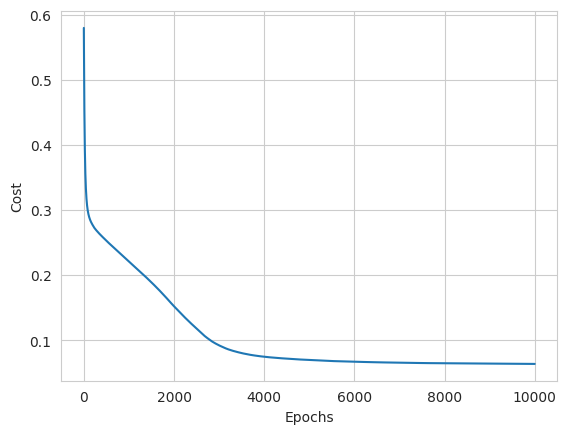

In [ ]:
#Plot the costs
#Make sure your doctests pass

plot(costs)

#print(costs)


import doctest


import doctest

"""
  >>> print(np.round(costs[0][1], 3))
  0.838
  >>> print(np.round(costs[75][1], 3))
  0.378
  >>> print(np.round(costs[1025][1], 3))
  0.237
  >>> print(np.round(costs[1557][1], 3))
  0.208
  >>> print(np.round(costs[2500][1], 3))
  0.121
  >>> print(np.round(costs[5000][1], 3))
  0.069
  >>> print(np.round(costs[7500][1], 3))
  0.066
  >>> print(np.round(costs[9999][1], 3))
  0.064
"""

doctest.testmod()

In [ ]:
#Make predictions on the train set.
#Make sure your doctests pass

predictions_train = planar_net.predict(X_train)

# Make predictions on the test set.
predictions_test = planar_net.predict(X_test)



#print(predictions_train)
#print(predictions_test)

import doctest

"""
  >>> print(predictions_train[0][17])
  0
  >>> print(predictions_train[0][50])
  1
  >>> print(predictions_test[0][15])
  1
  >>> print(predictions_test[0][6])
  0
"""

doctest.testmod()

In [ ]:
# Evaluate performance on the train set.
# Make sure your doctests pass

planar_net.evaluate(predictions_train, Y_train)



import doctest

"""
  >>> print(np.round(planar_net.evaluate(predictions_train, Y_train), 3))
  97.333
"""

doctest.testmod()

In [ ]:
# Evaluate performance on the test set.
# Make sure your doctests pass

planar_net.evaluate(predictions_test, Y_test)



import doctest

"""
  >>> print(np.round(planar_net.evaluate(predictions_test, Y_test), 3))
  100.0
"""

doctest.testmod()

In [ ]:
# number of samples in the data set
N_SAMPLES = 100

# Load the data and split into a train and test set.
X, Y = make_moons(n_samples = N_SAMPLES, noise=0.5, random_state=100)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# Batch Optimization Algorithms

###Batch Descent on Planar Data
Now we’re going to rerun our model on a smaller sample of the planar dataset. This dataset will be a little harder to classify, since we only have 100 examples, and the dataset is relatively noisy. Run the code provided to create the dataset, and then call the “make plot” function as you did in the previous unit to see the dataset visualized. This planar dataset could represent any labelled data that is describable in two dimensions – for instance, x and y coordinates of the location from where a basketball shot was made, and the label (that is the color of the data point) representing whether or not the shot went in. This makes our model widely applicable to a range of problems. Once you have plotted the dataset, run the reshaping cell and then call “see shapes”. You should see that we have a 90-10% train –test split.

Run the "Reshaping" cell then print out the shapes of your train and test dataset to see more information about your data. You should see the following shapes:

Number of training examples: m_train = 2 Number of testing examples: m_test = 2 X_train shape: (2, 90) Y_train shape: (1, 90) X_test shape: (2, 10) Y_test shape: (1, 10) Each example has two features (that is, the x and y coordinates in the plane) and one label (that is, the color of the point).



PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.11/doctest.py", line 1523, in run
    sys.settrace(save_trace)



TestResults(failed=0, attempted=4)

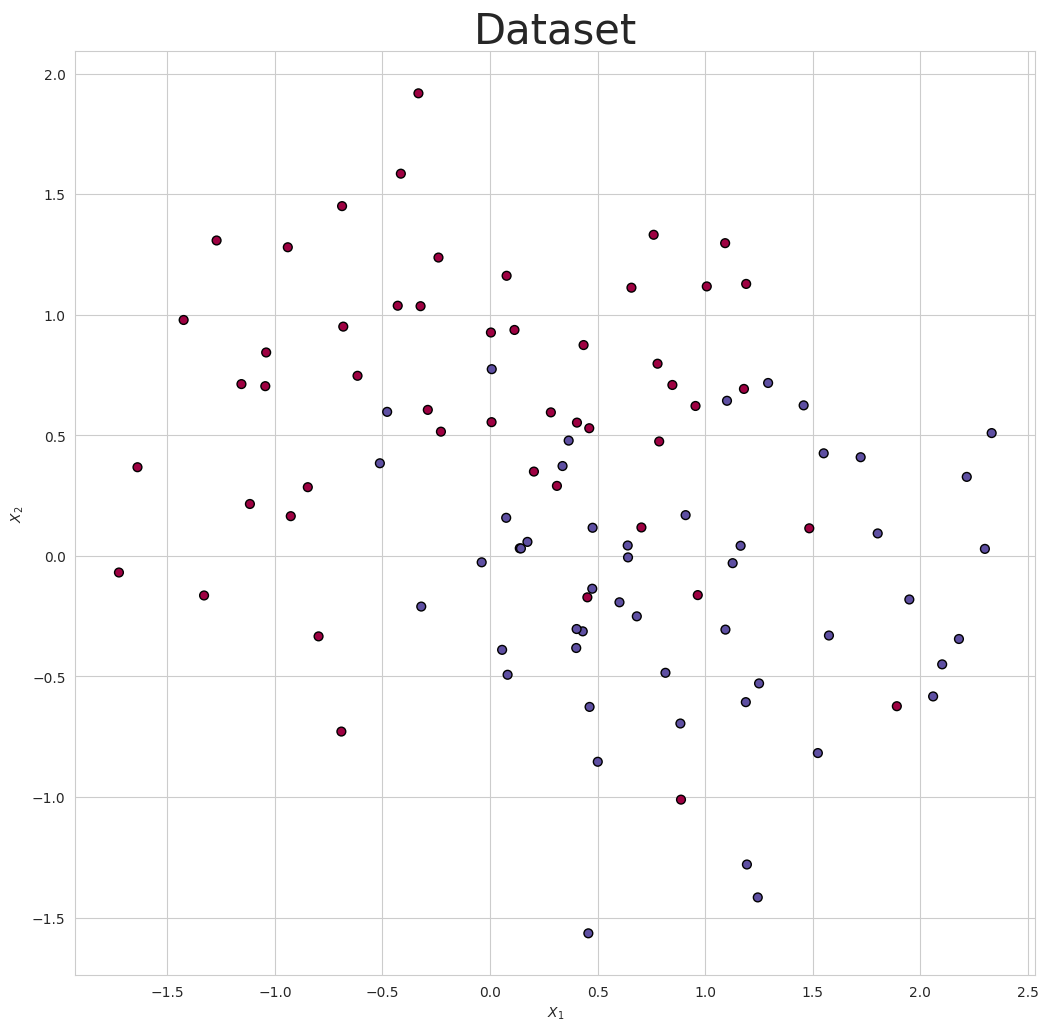

In [9]:
# number of samples in the data set
N_SAMPLES = 100

# Load the data and split into a train and test set.
X, Y = make_moons(n_samples = N_SAMPLES, noise=0.5, random_state=100)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# Call make_plot (pass X, Y, and the name of the plot only).
make_plot(X, Y, "Dataset")

# Reshaping.
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.reshape(1, Y_train.shape[0])
Y_test = Y_test.reshape(1, Y_test.shape[0])


import doctest

'''
  >>> print(X_train.shape)
  (2, 90)
  >>> print(X_test.shape)
  (2, 10)
  >>> print(Y_train.shape)
  (1, 90)
  >>> print(Y_test.shape)
  (1, 10)
'''

doctest.testmod()


**Batch Descent**  

Now we’re ready to run basic batch descent. Begin as before by instantiating your model.
Use the “build” method to pass in your network as a list of layers. You’ll be using the same network architecture as you previously did for planar classification.   
Your layers should have 25, 50, 50, 25, and 1 output units respectively, with all layers using the relu activation function except for the final layer which uses a sigmoid activation.  Only specify the output units, input units, and activation function for each layer – leave everything else as the default value.

In [8]:
# Instantiate your model.
np.random.seed(0) #do not change - for grading purposes

batch_model = Model()

# Build a deep neural network.
batch_model.build([
    Dense(output_units=25, input_units=2, activation='relu'),
    Dense(output_units=50, input_units=25, activation='relu'),
    Dense(output_units=50, input_units=50, activation='relu'),
    Dense(output_units=25, input_units=50, activation='relu'),
    Dense(output_units=1, input_units=25, activation='sigmoid')
])

Next, let’s fit the model to our data. Use  150,000 epochs and a learning rate of 0.001.
From the “fit” function, you should see that the default optimizer is “gradient descent”, which is what we want to use here so there is no need to specify it in the parameter list.
Lastly, we’ll need to consider what our “batch size” is .  
Since we’re performing basic batch descent, we want to use the entire training set once – therefore, you can pass in the number of examples “m” as the “batch size”, and note that you can extract this from the shape of X_train.   
Run the training and then plot the costs.    

Make sure your doctests pass without errors.

In [9]:
# Use the default batch descent algorithm by setting the batch size equal to the total number of examples in the train set.
# Fit your model to the training data with 150000 epochs and a learning_rate of 0.001.
costs = batch_model.fit(X_train, Y_train, epochs=150000, learning_rate=0.001, batch_size=X_train.shape[1])


**********************************************************************
File "__main__", line 3, in __main__
Failed example:
    print(np.round(costs[0][1], 3))
Expected:
    0.877
Got:
    0.632
**********************************************************************
File "__main__", line 5, in __main__
Failed example:
    print(np.round(costs[1000][1], 3))
Expected:
    0.454
Got:
    0.419
**********************************************************************
File "__main__", line 7, in __main__
Failed example:
    print(np.round(costs[10000][1], 3))
Expected:
    0.365
Got:
    0.359
**********************************************************************
File "__main__", line 9, in __main__
Failed example:
    print(np.round(costs[50000][1], 3))
Expected:
    0.269
Got:
    0.266
**********************************************************************
File "__main__", line 11, in __main__
Failed example:
    print(np.round(costs[100000][1], 3))
Expected:
    0.148
Got:
    0.143
********

TestResults(failed=6, attempted=6)

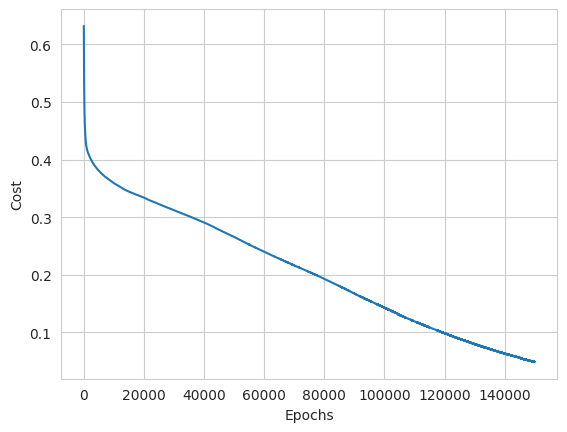

In [10]:
# Plot the costs.
plot(costs)



import doctest

"""
  >>> print(np.round(costs[0][1], 3))
  0.877
  >>> print(np.round(costs[1000][1], 3))
  0.454
  >>> print(np.round(costs[10000][1], 3))
  0.365
  >>> print(np.round(costs[50000][1], 3))
  0.269
  >>> print(np.round(costs[100000][1], 3))
  0.148
  >>> print(np.round(costs[149999][1], 3))
  0.033
"""

doctest.testmod()


Make predictions on train and test sets and evaluate performance.  
Make sure your doctests pass without errors

In [11]:
# Get predictions on the train set.
predictions_train = batch_model.predict(X_train)

# Get predictions on the test set.
predictions_test = batch_model.predict(X_test)



import doctest

"""
  >>> print(predictions_train[0][17])
  1
  >>> print(predictions_train[0][50])
  1
  >>> print(predictions_test[0][1])
  0
  >>> print(predictions_test[0][6])
  0
"""

doctest.testmod()

TestResults(failed=0, attempted=4)

In [12]:
# Evaluate train accuracy.
batch_model.evaluate(predictions_train, Y_train)


import doctest

"""
  >>> print(np.round(batch_model.evaluate(predictions_train, Y_train), 3))
  100.0
"""

doctest.testmod()

TestResults(failed=0, attempted=1)

In [13]:
# Evaluate test accuracy.
batch_model.evaluate(predictions_test, Y_test)


import doctest

"""
  >>> print(np.round(batch_model.evaluate(predictions_test, Y_test), 3))
  90.0
"""

doctest.testmod()

TestResults(failed=0, attempted=1)

**Reflection**

Batch descent increased the training speed for this model. It converged to a cost below 0.1 in 120,000 epochs, which is due to the low learning rate. It has a training accuracy of 100% and a test accuracy of 90%.

### Stochastic Gradient Descent   
Let’s now try SGD in practice. As before, instantiate your model and build the same network architecture as before.   
When fitting your model to the data, try using 20,000 epochs – since we’re taking so many more steps per epoch, should need fewer epochs to reach convergence.
Use the same learning rate of 0.001, and this time set the batch size to be 1 so that you’re implementing SGD.   
Training the model with SGD might take 5-10 minutes.   

Then as before, evaluate the accuracy.  
Make sure your doctests pass without errors.

In [14]:
# Instantiate your model.
np.random.seed(0) #do not change - for grading purposes

sgd_model = Model()

# Build a deep neural network.
sgd_model.build([
    Dense(output_units=25, input_units=2, activation='relu'),
    Dense(output_units=50, input_units=25, activation='relu'),
    Dense(output_units=50, input_units=50, activation='relu'),
    Dense(output_units=25, input_units=50, activation='relu'),
    Dense(output_units=1, input_units=25, activation='sigmoid')
])


In [15]:
# Use the stochastic gradient descent algorithm by setting the batch size to 1.
# Fit your model to the training data with 20000 epochs and a learning_rate of 0.001.
costs = sgd_model.fit(X_train, Y_train, epochs=20000, learning_rate=0.001, batch_size=1)


**********************************************************************
File "__main__", line 3, in __main__
Failed example:
    print(np.round(costs[0][1], 3))
Expected:
    0.328
Got:
    0.198
**********************************************************************
File "__main__", line 5, in __main__
Failed example:
    print(np.round(costs[15000][1], 3))
Expected:
    0.153
Got:
    0.202
**********************************************************************
File "__main__", line 7, in __main__
Failed example:
    print(np.round(costs[35000][1], 3))
Expected:
    0.078
Got:
    0.103
**********************************************************************
File "__main__", line 9, in __main__
Failed example:
    print(np.round(costs[50000][1], 3))
Expected:
    0.019
Got:
    0.008
**********************************************************************
File "__main__", line 11, in __main__
Failed example:
    print(np.round(costs[75000][1], 3))
Expected:
    0.015
Got:
    0.051
********

TestResults(failed=7, attempted=7)

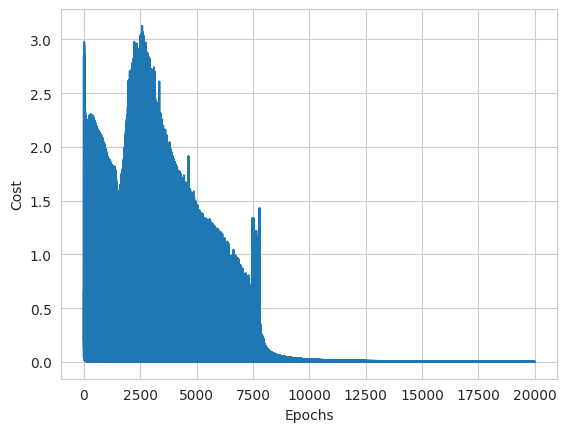

In [16]:
# Plot the costs.
# Make sure your doctests pass without error.

plot(costs)


import doctest

"""
  >>> print(np.round(costs[0][1], 3))
  0.328
  >>> print(np.round(costs[15000][1], 3))
  0.153
  >>> print(np.round(costs[35000][1], 3))
  0.078
  >>> print(np.round(costs[50000][1], 3))
  0.019
  >>> print(np.round(costs[75000][1], 3))
  0.015
  >>> print(np.round(costs[90000][1], 3))
  0.206
  >>> print(np.round(costs[120000][1], 3))
  0.003
"""

doctest.testmod()

In [17]:
# Get predictions on the train set.
# Make sure your doctests pass without error.

predictions_train = sgd_model.predict(X_train)

# Get predictions on the test set.
predictions_test = sgd_model.predict(X_test)


import doctest

"""
  >>> print(predictions_train[0][17])
  1
  >>> print(predictions_train[0][50])
  1
  >>> print(predictions_test[0][1])
  1
  >>> print(predictions_test[0][6])
  0
"""

doctest.testmod()

TestResults(failed=0, attempted=4)

In [ ]:
# Evaluate train accuracy.
# Make sure your doctests pass without error.

sgd_model.evaluate(predictions_train, Y_train)



import doctest

"""
  >>> print(np.round(sgd_model.evaluate(predictions_train, Y_train), 3))
  100.0
"""

doctest.testmod()

TestResults(failed=0, attempted=1)

In [ ]:
# Evaluate test accuracy.
# Make sure your doctests pass without error.

sgd_model.evaluate(predictions_test, Y_test)


import doctest

"""
  >>> print(np.round(sgd_model.evaluate(predictions_test, Y_test), 3))
  60.0
"""

doctest.testmod()

**********************************************************************
File "__main__", line 3, in __main__
Failed example:
    print(np.round(sgd_model.evaluate(predictions_test, Y_test), 3))
Expected:
    60.0
Got:
    70.0
**********************************************************************
1 items had failures:
   1 of   1 in __main__
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=1)

**Reflection:**
Stochastic gradient descent ran slightly slower but still showed good results. It reached a training accuracy of 100% and a test accuracy of 70%. The latter failed the doctest because it did better than the expected 60%.

### Mini-batch Descent

It turns out there is a way we can combine batch descent and SGD to get the best of both worlds. We can split our data into mini-batches of size ’n’.  In mini-batch descent, we compute the cost and perform an update per mini-batch, which allows us to make accurate estimates of the gradient, while still performing multiple steps of descent per epoch.  We’ll see that mini-batch descent provides a way to trade off the properties of the batch and stochastic algorithms in order to achieve performance somewhere between the two.

Instantiate a model again, building it with the same network architecture as before.
When fitting the model, use 50,000 epochs (since we need more than we used for SGD, but fewer than we needed for batch descent), use a learning rate of 0.001, and set the batch size to be 16.   

As usual, run the training, then plot the costs and evaluate the accuracy.  
Make sure your doctests pass without errors.


In [10]:
# Instantiate your model.
np.random.seed(0) #do not change - for grading purposes

mb_model = Model()

# Build a deep neural network.
mb_model.build([
    Dense(output_units=25, input_units=2, activation='relu'),
    Dense(output_units=50, input_units=25, activation='relu'),
    Dense(output_units=50, input_units=50, activation='relu'),
    Dense(output_units=25, input_units=50, activation='relu'),
    Dense(output_units=1, input_units=25, activation='sigmoid')
])


In [11]:
# Use the minibatch gradient descent algorithm by setting the batch size to 16.
# Fit your model to the training data with 50000 epochs and a learning_rate of 0.001.
costs = mb_model.fit(X_train, Y_train, epochs=50000, learning_rate=0.001, batch_size=16)


**********************************************************************
File "__main__", line 3, in __main__
Failed example:
    print(np.round(costs[0][1], 3))
Expected:
    0.811
Got:
    0.574
**********************************************************************
File "__main__", line 5, in __main__
Failed example:
    print(np.round(costs[15000][1], 3))
Expected:
    0.389
Got:
    0.386
**********************************************************************
File "__main__", line 7, in __main__
Failed example:
    print(np.round(costs[35000][1], 3))
Expected:
    0.21
Got:
    0.213
**********************************************************************
File "__main__", line 9, in __main__
Failed example:
    print(np.round(costs[50000][1], 3))
Expected:
    0.229
Got:
    0.217
**********************************************************************
File "__main__", line 11, in __main__
Failed example:
    print(np.round(costs[75000][1], 3))
Expected:
    0.275
Got:
    0.299
*********

TestResults(failed=8, attempted=8)

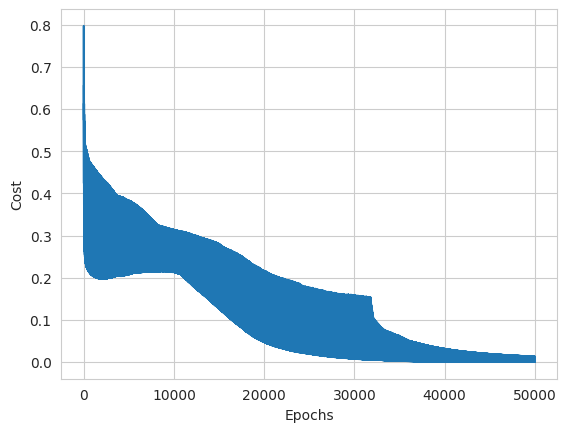

In [12]:
# Plot the costs.
# Make sure your doctests pass without error.

plot(costs)



import doctest

"""
  >>> print(np.round(costs[0][1], 3))
  0.811
  >>> print(np.round(costs[15000][1], 3))
  0.389
  >>> print(np.round(costs[35000][1], 3))
  0.21
  >>> print(np.round(costs[50000][1], 3))
  0.229
  >>> print(np.round(costs[75000][1], 3))
  0.275
  >>> print(np.round(costs[90000][1], 3))
  0.242
  >>> print(np.round(costs[120000][1], 3))
  0.121
  >>> print(np.round(costs[149999][1], 3))
  0.01
"""

doctest.testmod()

In [13]:
# Get predictions on the train set.
predictions_train = mb_model.predict(X_train)

# Get predictions on the test set.
predictions_test = mb_model.predict(X_test)



import doctest

"""
  >>> print(predictions_train[0][17])
  1
  >>> print(predictions_train[0][50])
  1
  >>> print(predictions_test[0][1])
  0
  >>> print(predictions_test[0][6])
  0
"""

doctest.testmod()

TestResults(failed=0, attempted=4)

In [14]:
# Evaluate train accuracy.

mb_model.evaluate(predictions_train, Y_train)


import doctest

"""
  >>> print(np.round(mb_model.evaluate(predictions_train, Y_train), 3))
  100.0
"""

doctest.testmod()

TestResults(failed=0, attempted=1)

In [15]:
# Evaluate test accuracy.

mb_model.evaluate(predictions_test, Y_test)


import doctest

"""
  >>> print(np.round(mb_model.evaluate(predictions_test, Y_test), 3))
  90.0
"""

doctest.testmod()

**********************************************************************
File "__main__", line 3, in __main__
Failed example:
    print(np.round(mb_model.evaluate(predictions_test, Y_test), 3))
Expected:
    90.0
Got:
    70.0
**********************************************************************
1 items had failures:
   1 of   1 in __main__
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=1)

WHEN YOU COMPLETE THIS SECTION - STOP, AND UPLOAD YOUR COLAB SCRIPT FOR THIS ASSIGNMENT.

**Reflection:**
The model converged pretty quickly, in 1 minute of runtime. The training accuracy was 100% but the test accuracy emerged lower at 70%. Using epochs and learning rates different to the ones assigned in this section of the project may be necessary to improve testing accuracy.

